In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("IPG2211A2N.csv")

In [4]:
data.head()

,DATE,IPG2211A2N
0,1992-01-01,84.2776
1,1992-02-01,79.2162
2,1992-03-01,73.6222
3,1992-04-01,68.7932
4,1992-05-01,66.3713


In [5]:
data_arr = data.iloc[:,1].values.reshape(-1, 1)

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_arr = scaler.fit_transform(data_arr)

In [ ]:
data_arr

In [11]:
training_data = data_arr[:int(0.8*len(data_arr)), :]
testing_data = data_arr[int(0.8*len(data_arr)):, :]
num_features = 1

In [15]:
def create_dataset(data_arg, time_steps = 1):
  x, y = [], []
  for i in range(len(data_arg)-time_steps):
    x.append(data_arg[i:(i+time_steps), 0])
    y.append(data_arg[i+time_steps, 0])
  return np.array(x), np.array(y)

In [16]:
x_train, y_train = create_dataset(training_data)
x_test, y_test = create_dataset(testing_data)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], num_features))

In [17]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], num_features)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
9/9 [==============================] - 7s 7ms/step - loss: 0.1979
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1657
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1270
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0825
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0397
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0283
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0290
Epoch 8/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0256
Epoch 9/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0255
Epoch 10/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0242
Epoch 11/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0229
Epoch 12/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0226
Epoch 13/100
9/9 [==============================] - 0s 6ms/st

In [20]:
y_pred = model.predict(x_test)

2/2 [==============================] - 2s 12ms/step


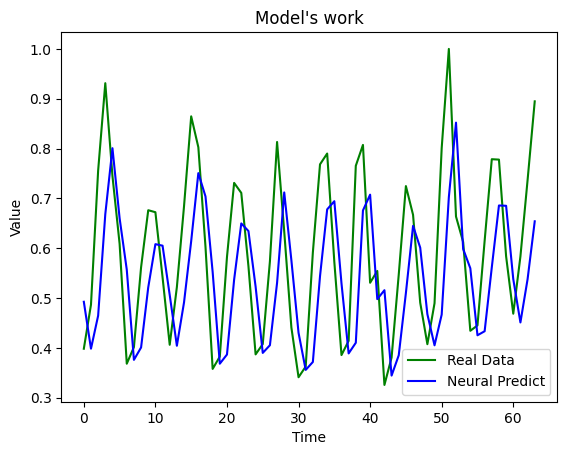

In [25]:
plt.plot(y_test, color="green", label="Real Data")
plt.plot(y_pred, color="blue", label="Neural Predict")
plt.title("Model's work")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()